In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [5]:
path = 'C://Users/beile.yaaqob.aisin/Downloads/The_Reddit_Ethereum_Dataset/'

In [4]:
nltk.download('stopwords')

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beile.yaaqob.aisin\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
#removing links from text
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [6]:
df = pd.read_csv(path+'data.csv')

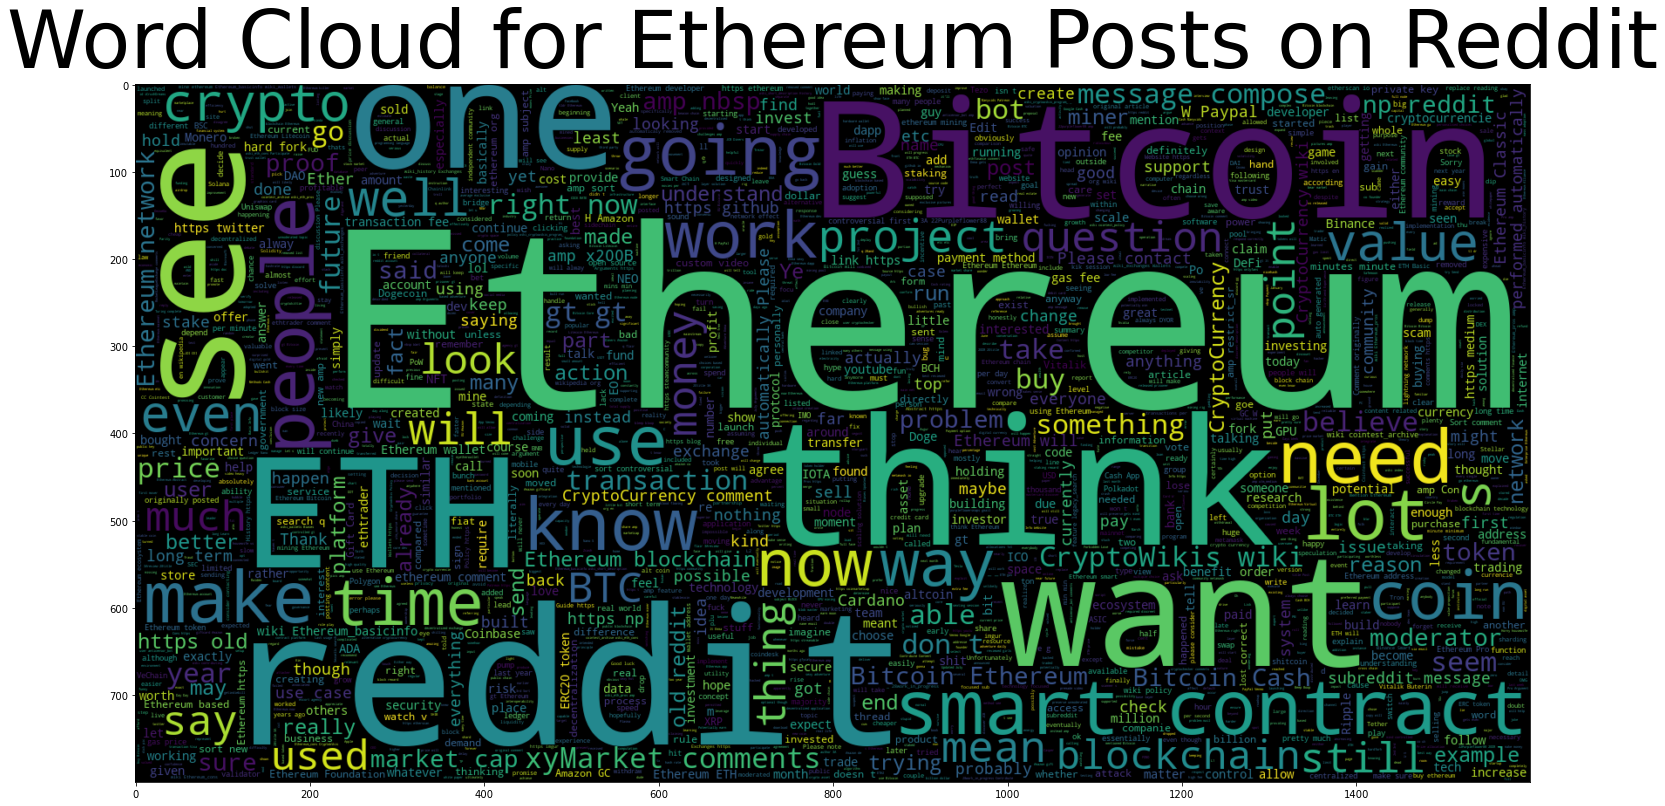

In [8]:
plt.figure(figsize = (25,25)) 
plt.title('Word Cloud for Ethereum Posts on Reddit',fontsize=80)
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df['body']))
plt.imshow(wc , interpolation = 'bilinear')

In [12]:
btc = pd.read_csv(path+'btc_price.csv')
btc['Date'] = pd.to_datetime(btc['Date'])
btc = btc[btc['Date'] > '2021-07-12']
btc = btc[['Date','Adj Close']]

eth = pd.read_csv(path+'eth_price.csv')
eth['Date'] = pd.to_datetime(eth['Date'])
eth = eth[eth['Date'] > '2021-07-12']
eth = eth[['Date','Adj Close']]

In [22]:
import pandas_datareader as web
import datetime as dt

start = dt.datetime(2021,7,12) # arbitrary begining date of the last market cycle
end = dt.datetime(2021,11,1) #end date of the eth reddit dataset

ada = web.DataReader('ADA-USD', 'yahoo', start, end)
ada['Date'] = pd.to_datetime(ada.index)
ada = ada.reset_index(drop=True)
ada = ada[['Date','Adj Close']]

sol = web.DataReader('SOL1-USD', 'yahoo', start, end)
sol['Date'] = pd.to_datetime(sol.index)
sol = sol.reset_index(drop=True)
sol = sol[['Date','Adj Close']]

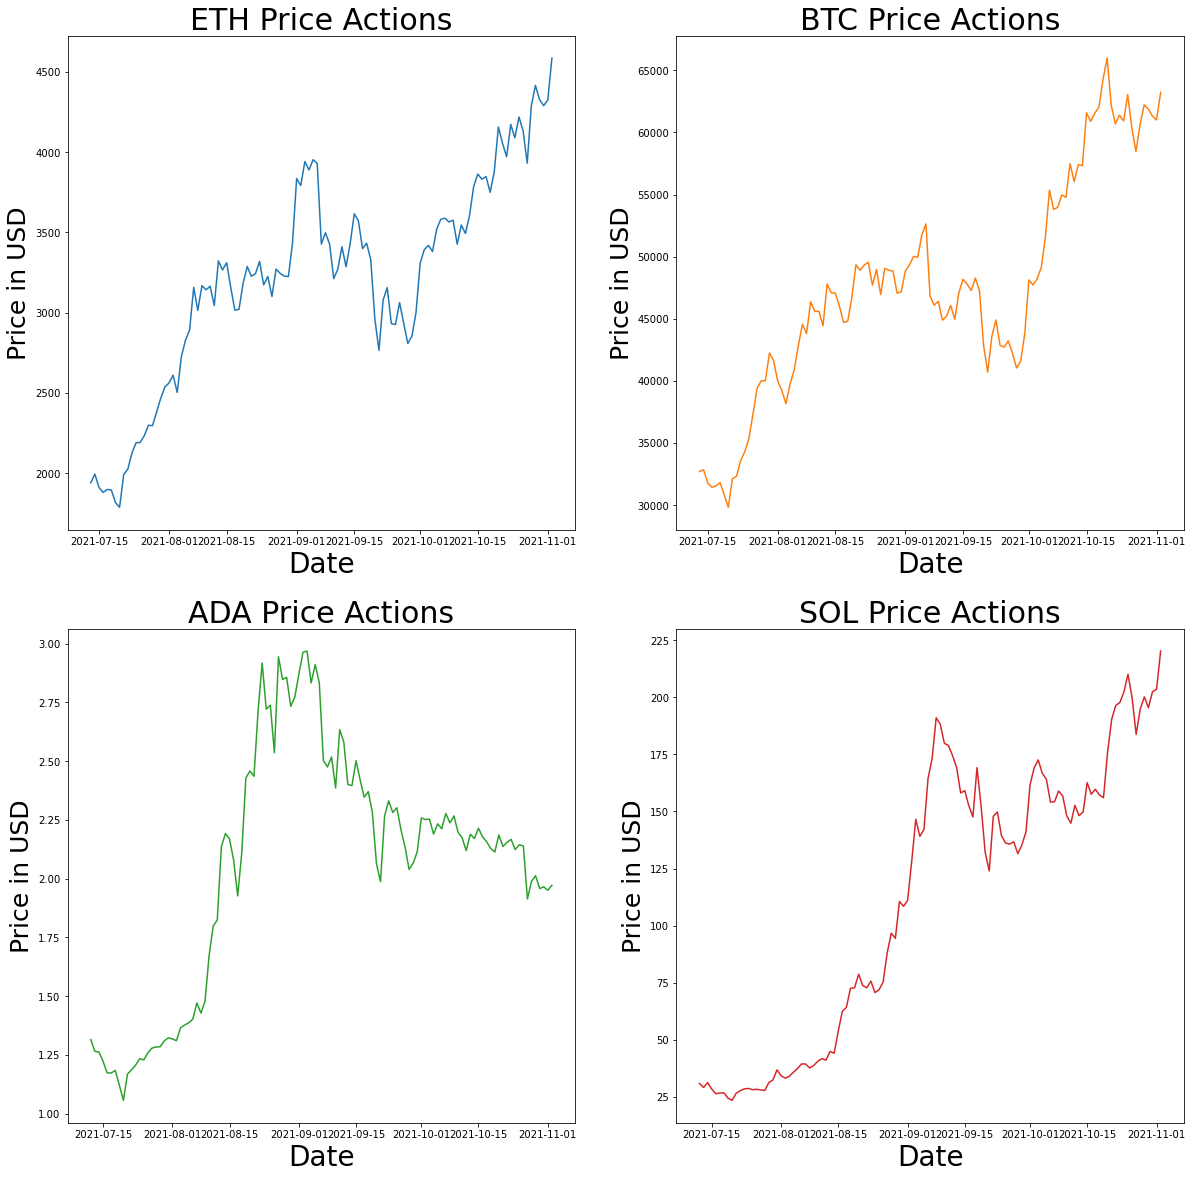

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(20,20))

axs[0, 0].plot(eth['Date'], eth['Adj Close'])
axs[0, 0].set_title('ETH Price Actions', fontsize=30)
axs[0, 1].plot(btc['Date'], btc['Adj Close'], 'tab:orange')
axs[0, 1].set_title('BTC Price Actions',fontsize=30)
axs[1, 0].plot(ada['Date'], ada['Adj Close'], 'tab:green')
axs[1, 0].set_title('ADA Price Actions',fontsize=30)
axs[1, 1].plot(sol['Date'], sol['Adj Close'], 'tab:red')
axs[1, 1].set_title('SOL Price Actions',fontsize=30)

for ax in axs.flat:
    ax.set_ylabel('Price in USD', fontsize = 25) # Y label
    ax.set_xlabel('Date', fontsize = 28) # X label